<a href="https://colab.research.google.com/github/aworklab/everydayPython/blob/main/ex_20220709.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 오늘의 목표
* regressor
* customer analysis

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
from datetime import datetime, date, time, timezone, timedelta
import os
import plotnine as gg
from plotnine import ggplot, aes 

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.decomposition import PCA 
from sklearn.impute import KNNImputer
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, f1_score, mean_squared_error
import sklearn.datasets as skd

# regressor

In [5]:
raw = skd.fetch_california_housing()
x = pd.DataFrame(raw['data'], columns = raw['feature_names'])
y = raw['target']
x.columns = [a.lower() for a in x.columns]
x.head()

,medinc,houseage,averooms,avebedrms,population,aveoccup,latitude,longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [19]:
x_tr, x_te, y_tr, y_te = train_test_split(x, y, train_size = .7)

In [20]:
scaler = RobustScaler()
x_tr_std = scaler.fit_transform(x_tr)
x_te_std = scaler.transform(x_te)

In [29]:
fit_lm = LinearRegression().fit(x_tr, y_tr)
fit_lm_std = LinearRegression().fit(x_tr_std, y_tr)
fit_rf = RandomForestRegressor().fit(x_tr, y_tr)
fit_rf_std = RandomForestRegressor().fit(x_tr_std, y_tr)

In [30]:
pred_lm = fit_lm.predict(x_te)
pred_lm_std = fit_lm_std.predict(x_te_std)
pred_rf = fit_rf.predict(x_te)
pred_rf_std = fit_rf_std.predict(x_te_std)

In [31]:
mean_squared_error(y_te, pred_lm), mean_squared_error(y_te, pred_lm_std), mean_squared_error(y_te, pred_rf),  mean_squared_error(y_te, pred_rf_std)

(0.5283580235593549, 0.528358023559355, 0.2520547399969358, 0.2527310525078548)

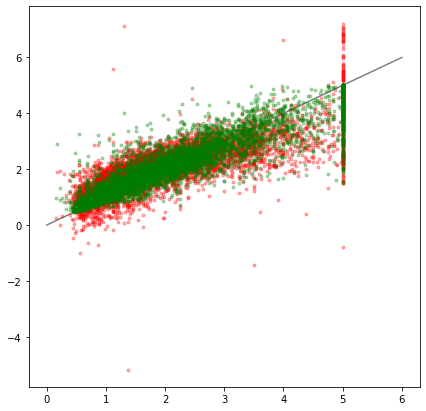

In [32]:
plt.figure(figsize = [7,7])
plt.plot([0,6], [0,6], color = 'grey')
plt.plot(y_te, pred_lm, '.', color = 'red', alpha = .3)
#plt.plot(y_te, pred_lm_std, '.', color = 'orange', alpha = .3)
plt.plot(y_te, pred_rf, '.', color = 'green', alpha = .3)
#plt.plot(y_te, pred_rf_std, '.', color = 'blue', alpha = .3)

In [35]:
raw2 = skd.load_boston()
x = pd.DataFrame(raw2['data'], columns = raw2['feature_names'])
y = raw2['target']
x.columns = [a.lower() for a in x.columns]
x.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [37]:
x_tr, x_te, y_tr, y_te = train_test_split(x, y, train_size = .7)

In [38]:
fit_lm = LinearRegression().fit(x_tr, y_tr)
fit_rf = RandomForestRegressor().fit(x_tr, y_tr)

In [39]:
pred_lm = fit_lm.predict(x_te)
pred_rf = fit_rf.predict(x_te)

In [40]:
mean_squared_error(y_te, pred_lm), mean_squared_error(y_te, pred_rf)

(19.592470516550726, 11.356403052631597)

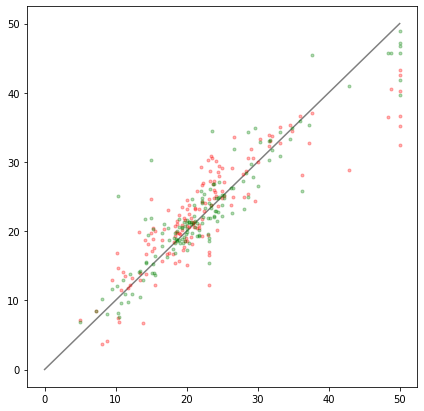

In [43]:
plt.figure(figsize = [7,7])
plt.plot([0, 50], [0,50], color = 'grey')
plt.plot(y_te, pred_lm, '.', color = 'red', alpha = .3)
plt.plot(y_te, pred_rf, '.', color = 'green', alpha = .3)

# customer analysis

In [44]:
os.listdir()

['.config',
 'retail_data_response.csv',
 'retail_data_transactions.csv',
 '.Rhistory',
 'shops.csv',
 'KPMG_VI_New_raw_data_update_final.xlsx',
 'sales_train.csv',
 'items.csv',
 'online_retail_II.xlsx',
 'ecommerce-data.csv',
 'sample_submission.csv',
 'listings.csv',
 'item_categories.csv',
 'rfm_test.csv',
 'test.csv',
 'sample_data']

In [50]:
df = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx', sheet_name= 'Transactions')
df.head()

,Note: The data and information in this document is reflective of a hypothetical situation and client. This document is to be used for KPMG Virtual Internship purposes only.,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
1,1,2,2950,2017-02-25 00:00:00,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245
2,2,3,3120,2017-05-21 00:00:00,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701
3,3,37,402,2017-10-16 00:00:00,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361
4,4,88,3135,2017-08-31 00:00:00,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.1,36145


In [51]:
df.columns = df.iloc[0]
df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
1,1,2,2950,2017-02-25 00:00:00,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245
2,2,3,3120,2017-05-21 00:00:00,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701
3,3,37,402,2017-10-16 00:00:00,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361
4,4,88,3135,2017-08-31 00:00:00,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.1,36145


In [54]:
df = df.drop([0], axis = 0)
df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
1,1,2,2950,2017-02-25 00:00:00,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245
2,2,3,3120,2017-05-21 00:00:00,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701
3,3,37,402,2017-10-16 00:00:00,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361
4,4,88,3135,2017-08-31 00:00:00,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.1,36145
5,5,78,787,2017-10-01 00:00:00,True,Approved,Giant Bicycles,Standard,medium,large,1765.3,709.48,42226


In [59]:
df = df[(df.order_status == 'Approved')]
df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
1,1,2,2950,2017-02-25 00:00:00,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245
2,2,3,3120,2017-05-21 00:00:00,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701
3,3,37,402,2017-10-16 00:00:00,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361
4,4,88,3135,2017-08-31 00:00:00,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.1,36145
5,5,78,787,2017-10-01 00:00:00,True,Approved,Giant Bicycles,Standard,medium,large,1765.3,709.48,42226


In [65]:
df = df[['customer_id', 'transaction_date', 'list_price']].rename(columns = {'customer_id':'id', 'transaction_date':'date', 'list_price':'rev'})
df.head()

,id,date,rev
1,2950,2017-02-25 00:00:00,71.49
2,3120,2017-05-21 00:00:00,2091.47
3,402,2017-10-16 00:00:00,1793.43
4,3135,2017-08-31 00:00:00,1198.46
5,787,2017-10-01 00:00:00,1765.3


In [66]:
df['date'] = df['date'].to_numpy().astype('datetime64[D]')
df.head()

,id,date,rev
1,2950,2017-02-25,71.49
2,3120,2017-05-21,2091.47
3,402,2017-10-16,1793.43
4,3135,2017-08-31,1198.46
5,787,2017-10-01,1765.3


In [67]:
df['month'] = df['date'].to_numpy().astype('datetime64[M]')
df.head()

,id,date,rev,month
1,2950,2017-02-25,71.49,2017-02-01
2,3120,2017-05-21,2091.47,2017-05-01
3,402,2017-10-16,1793.43,2017-10-01
4,3135,2017-08-31,1198.46,2017-08-01
5,787,2017-10-01,1765.3,2017-10-01


In [70]:
df = df.groupby(['id', 'month', 'date'])['rev'].sum().reset_index()
df.head()

,id,month,date,rev
0,1,2017-01-01,2017-01-05,360.4
1,1,2017-02-01,2017-02-21,71.49
2,1,2017-03-01,2017-03-27,688.63
3,1,2017-03-01,2017-03-29,1274.93
4,1,2017-04-01,2017-04-06,1577.53


In [79]:
info_m = df.groupby(['id', 'month'])['rev'].sum().reset_index().rename(columns = {'money':'rev'})
info_m = pd.pivot_table(info_m, index = 'id', columns = 'month', values = 'rev').reset_index()
info_m = pd.melt(info_m, id_vars = 'id', var_name = 'month', value_name = 'money').sort_values(['id', 'month'], ascending = [1, 0])
info_m = info_m.groupby(['id']).head(3)
info_m = info_m.groupby(['id'])['money'].sum().reset_index()
info_m.head()

,id,money
0,1,1209.08
1,2,0.00
2,3,0.00
3,4,0.00
4,5,1812.75


In [81]:
info_f = df.groupby(['id', 'month'])['rev'].count().reset_index().rename(columns = {'freq':'rev'})
info_f = pd.pivot_table(info_f, index = 'id', columns = 'month', values = 'rev').reset_index()
info_f = pd.melt(info_f, id_vars = 'id', var_name = 'month', value_name = 'freq').sort_values(['id', 'month'], ascending = [1, 0])
info_f = info_f.groupby(['id']).head(3)
info_f = info_f.groupby(['id'])['freq'].sum().reset_index()
info_f.head()

,id,freq
0,1,3.0
1,2,0.0
2,3,0.0
3,4,0.0
4,5,1.0


In [82]:
df['date'].max()

Timestamp('2017-12-30 00:00:00')

In [83]:
date_now = datetime(2017,12,31)

In [92]:
info_r = df.groupby(['id']).agg({'date': lambda x : (date_now - x.max()).days}).reset_index().rename(columns = {'date':'recency'})
info_r.head()

,id,recency
0,1,8
1,2,129
2,3,103
3,4,196
4,5,17


In [94]:
info = pd.merge(pd.merge(info_r, info_f, 'left', 'id'), info_m, 'left', 'id')
info.head()

,id,recency,freq,money
0,1,8,3.0,1209.08
1,2,129,0.0,0.00
2,3,103,0.0,0.00
3,4,196,0.0,0.00
4,5,17,1.0,1812.75


In [97]:
info = info.assign(r = pd.qcut(info['recency'], 5, list('12345')),
            f = pd.qcut(info['freq'].rank(method = 'first'), 5, list('54321')),
            m = pd.qcut(info['money'].rank(method = 'first'), 5, list('54321'))
            )
info.head()

,id,recency,freq,money,r,f,m
0,1,8,3.0,1209.08,1,1,3
1,2,129,0.0,0.00,5,5,5
2,3,103,0.0,0.00,5,5,5
3,4,196,0.0,0.00,5,5,5
4,5,17,1.0,1812.75,2,4,2


In [99]:
info = info.assign(rf = info['r'].astype(str) + info['f'].astype(str))
info.head()

,id,recency,freq,money,r,f,m,rf
0,1,8,3.0,1209.08,1,1,3,11
1,2,129,0.0,0.00,5,5,5,55
2,3,103,0.0,0.00,5,5,5,55
3,4,196,0.0,0.00,5,5,5,55
4,5,17,1.0,1812.75,2,4,2,24
